# Исследование объявлений о продаже квартир

Заказчик предоставил данные сервиса Яндекс.Недвижимость, где содержится архив объевлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

**Цель исследования** - исследовать объявления о продаже квартир в Санкт-Петербурге, отследив и отбросив аномалии.

**Ход исследования**

Данные сервиса Яндекс.Недвижимость будут получены из файла real_estate_data.csv. О качестве данных ничего не известно. Поэтому перед проведением основого анализа необходимо провести предобработку данных.

Таким образом, исследование можно разделить на следующие этапы:

1. Изучение данных из файла.
2. Предобработка данных.
3. Расчеты и добавление результатов в таблицу.
4. Исследовательский анализ данных.
                                                            

<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Обработка-пропусков" data-toc-modified-id="Обработка-пропусков-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Обработка пропусков</a></span></li><li><span><a href="#Изменение-типа-данных" data-toc-modified-id="Изменение-типа-данных-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Изменение типа данных</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Анализ-времени-продажи-квартиры" data-toc-modified-id="Анализ-времени-продажи-квартиры-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Анализ времени продажи квартиры</a></span></li><li><span><a href="#Редактирование-значений-времени-продажи-квартир" data-toc-modified-id="Редактирование-значений-времени-продажи-квартир-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Редактирование значений времени продажи квартир</a></span></li><li><span><a href="#Влияние-факторов-на-стоимость-квартиры" data-toc-modified-id="Влияние-факторов-на-стоимость-квартиры-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Влияние факторов на стоимость квартиры</a></span></li><li><span><a href="#Анализ-предложения-квартир" data-toc-modified-id="Анализ-предложения-квартир-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Анализ предложения квартир</a></span></li><li><span><a href="#Анализ-квартир-в-центре-города" data-toc-modified-id="Анализ-квартир-в-центре-города-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Анализ квартир в центре города</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li>

## Изучение данных из файла

In [148]:
# импортируем все необходимые для исследования библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [149]:
# загрузим файл с данными и сохраним его в df
df = pd.read_csv('/datasets/real_estate_data.csv', sep='\t')

In [150]:
# выведем на экран первые 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


В первых десяти строчках мы уже видим множество пропущенных значений. В дальнейшем в процессе предобработки данных изучим их природу и выполним необходимые с ними действия.

In [151]:
# получим общую информацию о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

In [152]:
# применим describe для изучения других параметров таблицы df
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
count,23699.000000,2.369900e+04,23699.000000,23699.000000,14504.000000,23613.000000,21796.000000,23699.000000,21421.000000,12180.000000,18157.000000,18180.000000,18181.000000,8079.000000,18181.000000,9110.000000,20518.000000
mean,9.858475,6.541549e+06,60.348651,2.070636,2.771499,10.673824,34.457852,5.892358,10.569807,1.150082,28793.672193,14191.277833,0.611408,490.804555,0.770255,517.980900,180.888634
std,5.682529,1.088701e+07,35.654083,1.078405,1.261056,6.597173,22.030445,4.885249,5.905438,1.071300,12630.880622,8608.386210,0.802074,342.317995,0.938346,277.720643,219.727988
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,2.000000,1.000000,1.300000,0.000000,0.000000,181.000000,0.000000,1.000000,0.000000,13.000000,1.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.520000,5.000000,18.600000,2.000000,7.000000,0.000000,18585.000000,9238.000000,0.000000,288.000000,0.000000,294.000000,45.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.650000,9.000000,30.000000,4.000000,9.100000,1.000000,26726.000000,13098.500000,0.000000,455.000000,1.000000,502.000000,95.000000
75%,14.000000,6.800000e+06,69.900000,3.000000,2.800000,16.000000,42.300000,8.000000,12.000000,2.000000,37273.000000,16293.000000,1.000000,612.000000,1.000000,729.000000,232.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,409.700000,33.000000,112.000000,5.000000,84869.000000,65968.000000,3.000000,3190.000000,3.000000,1344.000000,1580.000000


Итак, в таблице 22 столбца. В столбцах встречаются следующие типы данных: bool - в двух столбцах; float - в четырнадцати столбцах; int - в трех столбцах; object - в трех столбцах.

Согласно документации к данным:

- airports_nearest — расстояние до ближайшего аэропорта в метрах (м);
- balcony — число балконов;
- ceiling_height — высота потолков (м);
- cityCenters_nearest — расстояние до центра города (м);
- days_exposition — сколько дней было размещено объявление (от публикации до снятия);
- first_day_exposition — дата публикации;
- floor — этаж;
- floors_total — всего этажей в доме;
- is_apartment — апартаменты (булев тип);
- kitchen_area — площадь кухни в квадратных метрах (м²);
- last_price — цена на момент снятия с публикации;
- living_area — жилая площадь в квадратных метрах (м²);
- locality_name — название населённого пункта;
- open_plan — свободная планировка (булев тип);
- parks_around3000 — число парков в радиусе 3 км;
- parks_nearest — расстояние до ближайшего парка (м);
- ponds_around3000 — число водоёмов в радиусе 3 км;
- ponds_nearest — расстояние до ближайшего водоёма (м);
- rooms — число комнат;
- studio — квартира-студия (булев тип);
- total_area — площадь квартиры в квадратных метрах (м²);
- total_images — число фотографий квартиры в объявлении.

Анализ общей информации показал, что в столбцах ceiling_height, floors_total, living_area, is_apartment, kitchen_area, balcony, locality_name, airports_nearest, cityCenters_nearest, parks_around3000, parks_nearest, ponds_around3000, ponds_nearest и days_exposition содержатся пропущенные значения.

Далее обработаем пропущенные значения и изменим тип данных некоторых столбцов.

## Предобработка данных

### Обработка пропусков

In [153]:
# найдем количество пропущенных значений в df
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Прозведем следующие действия с пропусками:
- в столбцах ceiling_height и floors_total заменим пропуски на высоту потолков и количество этажей в этих же домах;
- в столбцах living_area и kitchen_area заменим пропуски на медианное значение;
- в столбце is_apartment заменим пропуски на False;
- в столбцах balcony, parks_around3000 и ponds_around3000 заменим пропуски на 0, т.к., скорее всего, в таких квартирах нет балконов, а парки и пруды не расположены к ним близко;
- строчки с пропущенными значениями в столбце locality_name можно удалить, так как они составляют всего 0.2% от всего объема;
- пропуски в столбцах airports_nearest, cityCenters_nearest, parks_nearest, ponds_nearest и days_exposition оставим без изменений, чтобы не исказить статистику.


Для того, чтобы заменить пропуски в столбцах ceiling_height и floors_total, убедимся, что квартиры, находящиеся на одном расстоянии от центра и аэропорта, находятся в одних и тех же домах с одинаковым количеством этажей.

In [154]:
# получим количество уникальных значений в столбце cityCenters_nearest
df['cityCenters_nearest'].value_counts()

8460.0     61
20802.0    32
10720.0    30
8434.0     27
20444.0    27
           ..
13104.0     1
11280.0     1
27218.0     1
10501.0     1
208.0       1
Name: cityCenters_nearest, Length: 7642, dtype: int64

In [155]:
# получим количество уникальных значений в столбце airports_nearest
df['airports_nearest'].value_counts()

37434.0    61
21928.0    32
39946.0    30
44870.0    30
37407.0    27
           ..
25122.0     1
26768.0     1
22248.0     1
20475.0     1
14579.0     1
Name: airports_nearest, Length: 8275, dtype: int64

Мы видим, что первые три строчки с количеством уникальных значений в двух столбцах имеют одинаковое количество. Следовательно, дома, которые находятся в этих строчках, должны иметь одинаковое количество этажей. Проверим это на примере 1-й строчки.

In [156]:
# получим список строк, которые содержат информацию о квартирах, имеющих в столбце cityCenters_nearest значение 8460 
# и в airports_nearest значение 37434.0
local_df = df[(df['cityCenters_nearest'] == 8460.0) & (df['airports_nearest'] == 37434.0)]

In [157]:
# проверим уникальные значения в столбце floors_total в полученном срезе
local_df['floors_total'].value_counts()

16.0    41
13.0    11
17.0     7
14.0     1
12.0     1
Name: floors_total, dtype: int64

Дома, находящиеся на одинаковом расстоянии от центра и аэропорта, имеют разное количество этажей, что вызывает сомнение в правильности указанной информации. Либо была допущена ошибка при указании количества этажей в доме, т.е. речь идет об одном и том же доме, либо была допущена техническая ошибка при указании расстояния до ключевых объектов, т.е. речь идет о разных домах. В связи с этим заменим пропуски на медианные значения

In [158]:
# обработаем пропуски
df.fillna(
value=
{'ceiling_height':df['ceiling_height'].median(),
 'floors_total':df['floors_total'].median(),
 'living_area':df['living_area'].median(),
 'kitchen_area':df['kitchen_area'].median(),
 'is_apartment':False,
 'balcony':0,
 'parks_around3000':0,
 'ponds_around3000':0
},
    inplace=True)
 

In [159]:
# удалим строчки с пропусками в столбце locality_name
df = df.dropna(subset=['locality_name'])

In [160]:
# проверим количество пропусков после обработки
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height              0
floors_total                0
living_area                 0
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area                0
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000            0
parks_nearest           15586
ponds_around3000            0
ponds_nearest           14565
days_exposition          3180
dtype: int64

Таким образом, были обработаны пропуски в столбцах, где была в этом необходимость. В остальных столбцах пропуски остались для неискажения статистической информации.

### Изменение типа данных

В столбце first_day_exposition преобразуем данные в формат даты. В столбцах last_price, floors_total и balcony изменим тип данных с float на int, так как значения в них являются вещественными числами.

In [161]:
# изменим тип данных в указанных выше столбцах
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')
columns = ['last_price', 'floors_total', 'balcony']
for i in columns:
    df[i] = df[i].astype('int')

В результате предобратки данных все столбцы были переведены в соответствующий формат для упрощения выполнения дальнейших операций со значениями.

## Расчёты и добавление результатов в таблицу

После того, как была выполнена предобработка данных, перейдем к расчету показателей, изучение которых приблизит нас к выполнению цели проекта.

In [162]:
# рассчитаем цену квадратного метра и добавим ее в таблицу
df['price_for_meter'] = df['last_price'] / df['total_area']
df['price_for_meter'].round(2)

0        120370.37
1         82920.79
2         92785.71
3        408176.10
4        100000.00
           ...    
23694     72490.85
23695     52542.37
23696     44091.71
23697    149511.40
23698     41795.67
Name: price_for_meter, Length: 23650, dtype: float64

In [163]:
# рассчитаем и добавим в таблицу день недели, месяц и год публикации объявления
df['day'] = df['first_day_exposition'].dt.weekday
df['month'] = df['first_day_exposition'].dt.month
df['year'] = df['first_day_exposition'].dt.year

In [164]:
# рассчитаем и добавим в таблицу категориальные значения этажа квартиры
# для этого составим функцию
def categorize_floors(row):
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'

In [165]:
# добавим новый столбец в df
df['floor_category'] = df.apply(categorize_floors, axis=1)

In [166]:
# рассчитаем и добавим в таблицу соотношение жилой и общей площади,
# а также отношение площади кухни к общей
df['ratio_of_living_and_total_area'] = df['living_area'] / df['total_area']
df['ratio_of_kitchen_and_total_area'] = df['kitchen_area'] / df['total_area']

In [167]:
# проверим добавление новых столбцов в df
df.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day,month,year,floor_category,ratio_of_living_and_total_area,ratio_of_kitchen_and_total_area
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,False,...,2.0,755.0,NaN,120370.370370,3,3,2019,другой,0.472222,0.231481
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,False,...,2.0,574.0,558.0,92785.714286,3,8,2015,другой,0.612500,0.148214
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000


В результате были добавлены новые столбцы, которые в дальнейшем позволят провести исследовательский анализ данных.

## Исследовательский анализ данных

### Анализ времени продажи квартиры

На следующем этапе изучим такие параметры, как площадь, цена, число комнат, высота потолков. Для этого определим, как они коррелируют между собой, и построим их гистограммы.

In [168]:
# составим таблицу, состоящую из четырех столбцов
df_new = df[['total_area', 'last_price', 'rooms', 'ceiling_height']]

In [169]:
# проведем корреляцию между этими значениями
df_new.corr()

,total_area,last_price,rooms,ceiling_height
total_area,1.000000,0.653743,0.758745,0.080606
last_price,0.653743,1.000000,0.363421,0.064388
rooms,0.758745,0.363421,1.000000,0.047901
ceiling_height,0.080606,0.064388,0.047901,1.000000


Мы видим сильную корреляцию между ценой квартиры и количеством комнат. В наименьшей степени обнаружена связь между ценой и высотой потолков.

In [170]:
# слздадим словарь с названиями столбцов и названиями графиков для построения гистрограмм с помощью цикла
df_hists = {'total_area': 'Общая площадь', 'last_price': 'Цена', 'rooms': 'Число комнат', 'ceiling_height': 'Высота потолков'}

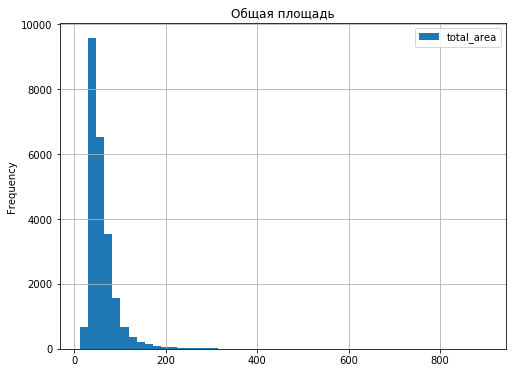

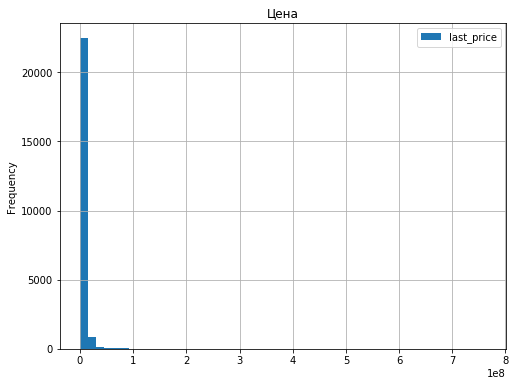

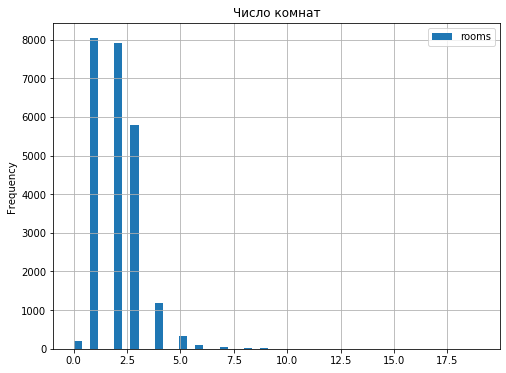

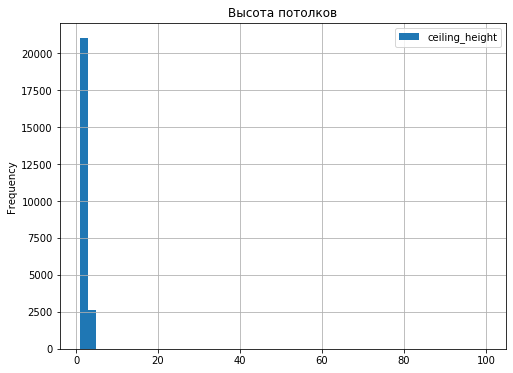

In [171]:
# построим гистограммы четырех параметров
for key in df_hists:
    df.plot(kind='hist', y=key, title=df_hists[key], grid=True, bins=50, figsize=(8, 6))

1. Графики общей площади и цены имеют вид Пуассоновского распределения. 
2. Согласно гистограмме, большинство квартир имеют площадь менее 50 кв.м, а в целом она находится в границе от 12 кв.м до 900 кв.м.
3. Наибольшее количество квартир имеют цену около 4 млн.руб. Цена находится в диапозоне от 1 млн.руб. до 200 млн.руб.
4. Большинство квартир имеют одну комнату, но не сильно отстают и двухкомнатные квартиры.
5. Высота потолков в среднем составляет 2,7 м, но встречаются также аномальные значения в 4 и 4,2 м.

### Редактирование значений времени продажи квартир

Изучим время снятия объявления. Для этого построим гистограмму, посчитаем среднее и медиану, а также опишем, через какое время обычно снимается объявление о продаже квартиры.

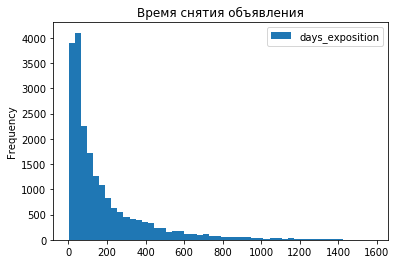

In [172]:
# построим гистограмму времени продажи квартиры
df.plot(kind='hist', y='days_exposition', bins=50, title='Время снятия объявления')
plt.show()

In [173]:
# посчитаем среднее и медиану снятия объявления о продаже квартиры
print("Среднее время снятия объявления о продаже квартиры составляет: {:.1f}". format(df['days_exposition'].mean()))
print('Медианное время снятия объявления о продаже квартиры составляет: {:.0f}'. format(df['days_exposition'].median()))

Среднее время снятия объявления о продаже квартиры составляет: 180.8
Медианное время снятия объявления о продаже квартиры составляет: 95


График среднего времени снятия объявления о продаже квартиры обладает пуассоновским распределением. Так среднее значение сильно отличается от медианного, то можно заключить, что в данном случае можно говорить о наличии сильных выбросов. Посмотрим на эти выбросы с помощью графика boxplot.

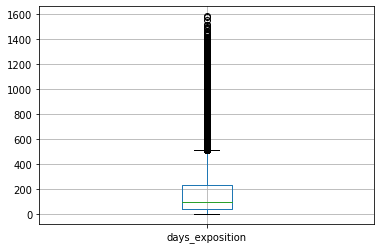

In [174]:
df.boxplot(['days_exposition'], grid=True)
plt.show()

Мы видим, что большое количество значений находится за 3 квартилем. Отфильтруем аномальные значения, создав условия, при которых будем считать продажу быстрой, если она осуществляется в течение 2 недель, а медленной, если в течение 1,5 лет.

In [175]:
# избавимся от выбросов и аномальных значений
good_df = df.query('14 < days_exposition < 550')
good_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day,month,year,floor_category,ratio_of_living_and_total_area,ratio_of_kitchen_and_total_area
1,7,3350000,40.4,2018-12-04,1,2.65,11,18.6,1,False,...,0.0,NaN,81.0,82920.792079,1,12,2018,первый,0.460396,0.272277
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
5,10,2890000,30.4,2018-09-10,1,2.65,12,14.4,5,False,...,0.0,NaN,55.0,95065.789474,0,9,2018,другой,0.473684,0.299342
6,6,3700000,37.3,2017-11-02,1,2.65,26,10.6,6,False,...,0.0,NaN,155.0,99195.710456,3,11,2017,другой,0.284182,0.386059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23690,3,5500000,52.0,2018-07-19,2,2.65,5,31.0,2,False,...,0.0,NaN,15.0,105769.230769,3,7,2018,другой,0.596154,0.115385
23691,11,9470000,72.9,2016-10-13,2,2.75,25,40.3,7,False,...,1.0,806.0,519.0,129903.978052,3,10,2016,другой,0.552812,0.145405
23692,2,1350000,30.0,2017-07-07,1,2.65,5,17.5,4,False,...,0.0,NaN,413.0,45000.000000,4,7,2017,другой,0.583333,0.200000
23693,9,4600000,62.4,2016-08-05,3,2.60,9,40.0,8,False,...,1.0,675.0,239.0,73717.948718,4,8,2016,другой,0.641026,0.128205


In [176]:
# посмотрим на самые распространенные сроки осуществления сделки
good_df['days_exposition'].value_counts().head(10)

45.0    879
60.0    538
30.0    208
90.0    203
20.0    139
44.0    138
18.0    129
15.0    125
22.0    125
28.0    125
Name: days_exposition, dtype: int64

В основном объявления снимались на 45, 60, 30 и 90 день. Столь "красивые" числа и такое большое снятие объявлений могут говорить о том, что сервис Яндекс.Недвижимость автоматически удаляет объявления через определенное количество дней в зависимости от суммы оплаченных услуг.

### Влияние факторов на стоимость квартиры

Далее определим, какие факторы больше всего влияют на стоимость квартиры. Для этого сделаем срез по определенным параметрам.

In [177]:
# создадим новую таблицу, в которую включим стоимость жилья и факторы, от которых она может зависить
new_df = good_df[['last_price', 'total_area', 'rooms', 'floor_category', 'cityCenters_nearest']]
new_df.head(10)

,last_price,total_area,rooms,floor_category,cityCenters_nearest
1,3350000,40.40,1,первый,18603.0
3,64900000,159.00,3,другой,6800.0
4,10000000,100.00,2,другой,8098.0
5,2890000,30.40,1,другой,NaN
6,3700000,37.30,1,другой,19143.0
8,2900000,33.16,1,другой,NaN
9,5400000,61.00,3,другой,15008.0
10,5050000,39.60,1,другой,13878.0
12,3890000,54.00,2,последний,NaN
13,3550000,42.80,2,последний,33058.0


In [178]:
# посчитаем корреляцию между параметрами
new_df.corr()

,last_price,total_area,rooms,cityCenters_nearest
last_price,1.000000,0.631405,0.340480,-0.184538
total_area,0.631405,1.000000,0.759352,-0.224445
rooms,0.340480,0.759352,1.000000,-0.178823
cityCenters_nearest,-0.184538,-0.224445,-0.178823,1.000000


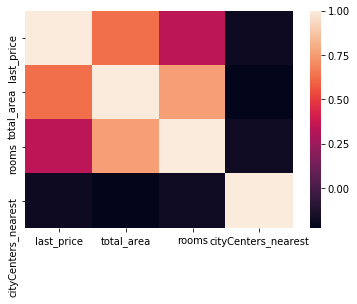

In [179]:
# визуализируем матрицу корреляции с помощью тепловой карты
sns.heatmap(new_df.corr())
plt.show()

Мы видим наибольшую положительную корреляцию между ценой квартиры и числом квадратных метров. При этом цена квартиры уменьшается по мере удаления от центра. Цена также коррелирует с количеством комнат, но в меньшей степени, чем с площадью квартиры.

In [180]:
# сгруппируем нашу таблицу по этажу
floor_price = good_df[['floor_category', 'last_price']].groupby('floor_category').median().sort_values(by='last_price')
floor_price

,last_price
floor_category,
первый,3800000
последний,4200000
другой,4665000


Text(0.5, 1.0, 'Зависимость медианной стоимости квартиры от этажа')

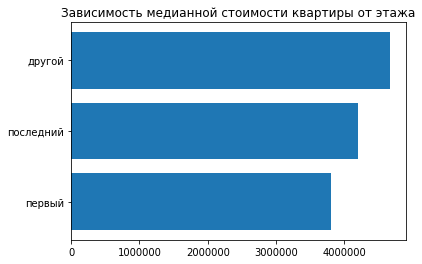

In [181]:
# построим график, отражающий зависимость медианной стоимости квартиры от этажа
plt.barh(floor_price.index, floor_price['last_price'])
plt.title('Зависимость медианной стоимости квартиры от этажа')

Самая низкая цена у квартир, находящихся на первом этаже. Немного дороже квартиры на последнем этаже.

In [182]:
# сгруппируем таблицу по дню размещения объявления
day_price = good_df[['day', 'last_price']].groupby('day').median().sort_values(by='last_price', ascending=False)
day_price

,last_price
day,
1,4550000
0,4500000
2,4500000
3,4500000
5,4500000
4,4450000
6,4400000


In [183]:
# найдем корреляцию между ценой и днем размещения объявления
good_df['last_price'].corr(good_df['day'])

0.004788852012844387

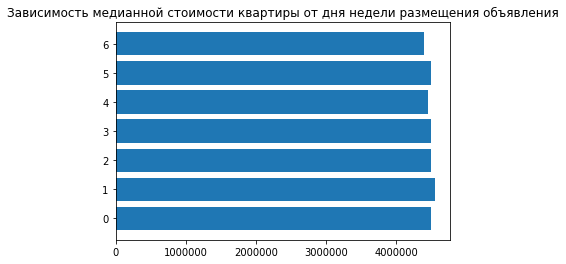

In [184]:
# построим график, отражающий зависимость медианной стоимости квартиры от дня недели размещения объявления
plt.barh(day_price.index, day_price['last_price'])
plt.title('Зависимость медианной стоимости квартиры от дня недели размещения объявления')
plt.show()

Между ценой квартиры и днем недели корреляция очень слабая. Однако немного выше, чем в остальные дни, цена квартиры, когда объявление размещается во вторник и в субботу.

In [185]:
# сгруппируем таблицу по месяцу размещения объявления
month_price = good_df[['month', 'last_price']].groupby('month').median().sort_index()
month_price

,last_price
month,
1,4500000
2,4500000
3,4450000
4,4500000
5,4450000
6,4350000
7,4500000
8,4500000
9,4600000


In [186]:
# найдем корреляцию между ценой и месяцем размещения объявления
good_df['last_price'].corr(good_df['month'])

0.004117442476709208

Text(0.5, 1.0, 'Зависимость медианной стоимости квартиры от месяца')

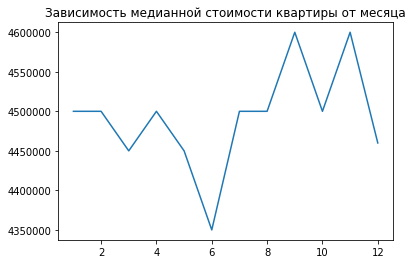

In [187]:
# построим график, отражающий зависимость медианной стоимости квартиры от месяца
plt.plot(month_price.index, month_price['last_price'])
plt.title('Зависимость медианной стоимости квартиры от месяца')

Между ценой квартиры и месяцем размещения объявления слабая корреляция. Немного дороже цена квартиры, объявление о продаже которой было размещено в сентябре и ноябре. Очевидных причин для этого нет.

In [188]:
# сгруппируем таблицу по году размещения объявления
year_price = good_df[['year', 'last_price']].groupby(['year']).median().sort_values(by='last_price', ascending=False)
year_price

,last_price
year,
2015,4900000
2019,4800000
2017,4500000
2018,4500000
2016,4450000


In [189]:
# найдем корреляцию между ценой и годом размещения объявления
good_df['last_price'].corr(good_df['year'])

-0.0358915526798848

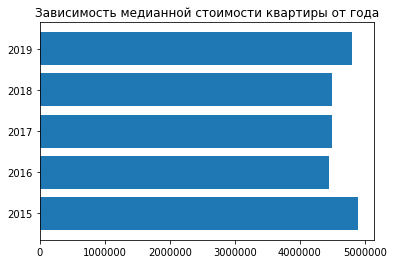

In [190]:
# построим график, отражающий зависимость медианной стоимости квартиры от года
plt.barh(year_price.index, year_price['last_price'])
plt.title('Зависимость медианной стоимости квартиры от года')
plt.show()

Согласно коэффициенту корреляции Пирсона между стоимостью квартиры и годом размещеняя объявления имеется обратная средняя связь. В 2014 г. стоимость была наибольшей. Видимо, это связано с резким увеличением спроса на недвижимость - в этот период люди опасались за свои средства перед кризисом и массово стали искать возможности вложения своих денег.

Выберем 10 населённых пунктов с наибольшим числом объявлений, посчитаем среднюю цену квадратного метра в этих населённых пунктах и выделим населённые пункты с самой высокой и низкой стоимостью жилья.

In [191]:
# составим сводную таблицу, в которую включим в качестве строк названия населенных пунктов, в качестве значений -
# цену квадратного метра, и применим к ней 2 функции: 'count' и 'mean'
top_locals=good_df.pivot_table(index='locality_name', values='price_for_meter', aggfunc=('count', 'mean'))
# для возможности отсортировать сводную таблицу по количеству объявлений добавим значения показателей примененных функций
# в новые столбцы с одноименными названиями
top_locals.columns=('count', 'mean')
# отсортируем населенные пункты по количеству объявлений и заодно увидим среднюю стоимость квадратного метра жилья в них
head_top_locals =top_locals.sort_values(by='count', ascending=False).head(10)

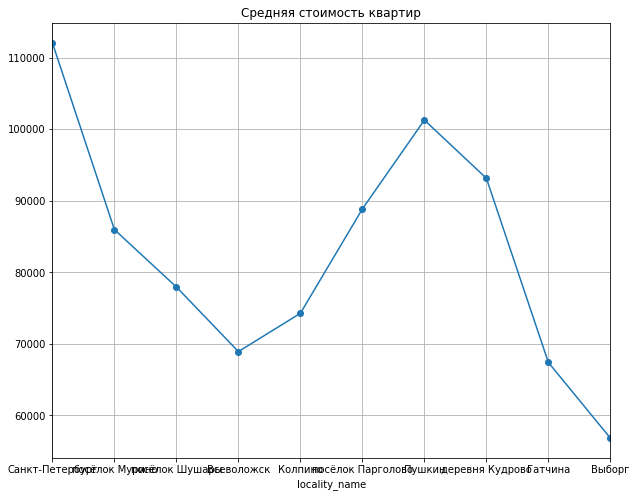

In [192]:
# построим график средней стоимости жилья
head_top_locals['mean'].plot(figsize=(10, 8), title='Средняя стоимость квартир', style='o-', grid=True)
plt.show()

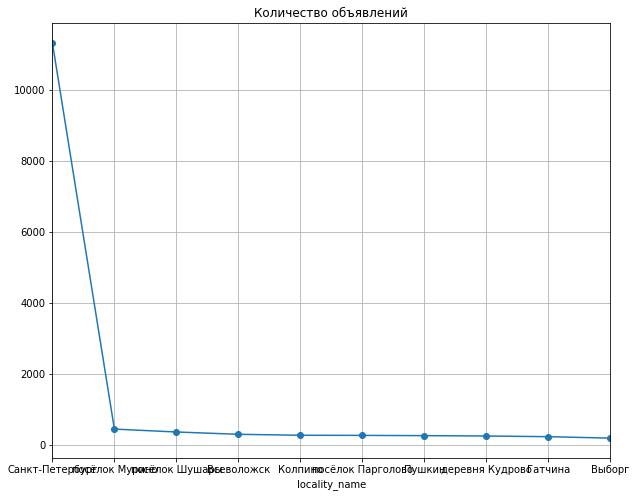

In [193]:
# построим график количества объявлений
head_top_locals['count'].plot(figsize=(10, 8), title='Количество объявлений', style='o-', grid=True)
plt.show()

In [194]:
# выделим населенные пункты с самой высокой стоимостью квадратного метра жилья
top_locals[top_locals['mean'] == top_locals['mean'].max()]

,count,mean
locality_name,,
посёлок Лисий Нос,1,168706.69746


In [195]:
# выведим на экран строчку со значениями всех параметров для поселка Лисий Нос
good_df[good_df['locality_name'] == 'посёлок Лисий Нос']

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day,month,year,floor_category,ratio_of_living_and_total_area,ratio_of_kitchen_and_total_area
21934,3,7305000,43.3,2018-10-09,1,2.65,10,30.0,10,False,...,0.0,NaN,60.0,168706.69746,1,10,2018,последний,0.692841,0.228637


In [196]:
# выделим населенные пункты с самой низкой стоимостью квадратного метра жилья
top_locals[top_locals['mean'] == top_locals['mean'].min()]

,count,mean
locality_name,,
деревня Старополье,3,11206.221198


Самое высокое среднее значение стоимости квадратного метра жилья в поселке Лисий Нос. Там всего одно объявление и по остальным значением сложно понять, с чем связана столь высокая цена квадратного метра квартиры (она находится на последнем этаже, имеет одну комнату и 43,3 кв.м. Возможно, там был сделан очень дорогой ремонт. Самое низкая стоимость квадратного метра жилья в деревне Старополье. Больше всего объявлений в Санкт-Петербурге, при этом и стоимость квадратного метра там очень высокая. Из первой десятки населенных пунктов по количеству объявлений Выборг обладает самой низкой средней стоимостью квадратного метра жилья.

### Анализ предложения квартир

Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге. Основная задача — выяснить, какая область входит в центр. Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. После этого посчитаем среднюю цену для каждого километра. Построим график: он должен показывать, как цена зависит от удалённости от центра. Определим границу, где график сильно меняется — это и будет центральная зона.

In [197]:
# выделим квартиры в Санкт-Петербурге
df_spb = good_df.query('locality_name == "Санкт-Петербург"').copy()
# выведем на экран первые 10 строчек новой таблицы
df_spb.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_for_meter,day,month,year,floor_category,ratio_of_living_and_total_area,ratio_of_kitchen_and_total_area
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,False,...,3.0,234.0,424.0,408176.100629,4,7,2015,другой,0.188679,0.057233
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,False,...,1.0,48.0,121.0,100000.000000,1,6,2018,другой,0.320000,0.410000
9,18,5400000,61.0,2017-02-26,3,2.50,9,43.6,7,False,...,0.0,NaN,289.0,88524.590164,6,2,2017,другой,0.714754,0.106557
10,5,5050000,39.6,2017-11-16,1,2.67,12,20.3,3,False,...,2.0,553.0,137.0,127525.252525,3,11,2017,другой,0.512626,0.214646
15,16,4650000,39.0,2017-11-18,1,2.65,14,20.5,5,False,...,1.0,296.0,19.0,119230.769231,5,11,2017,другой,0.525641,0.194872
16,11,6700000,82.0,2017-11-23,3,3.05,5,55.6,1,False,...,0.0,NaN,397.0,81707.317073,3,11,2017,первый,0.678049,0.109756
18,8,3250000,31.0,2017-01-27,1,2.50,5,19.4,2,False,...,0.0,NaN,168.0,104838.709677,4,1,2017,другой,0.625806,0.180645
19,16,14200000,121.0,2019-01-09,3,2.75,16,76.0,8,False,...,0.0,NaN,97.0,117355.371901,2,1,2019,другой,0.628099,0.099174
21,13,3200000,31.6,2018-03-14,1,2.65,5,16.9,2,False,...,0.0,NaN,310.0,101265.822785,2,3,2018,другой,0.534810,0.180380
24,8,6500000,97.2,2015-10-31,2,2.65,3,46.5,1,False,...,3.0,124.0,265.0,66872.427984,5,10,2015,первый,0.478395,0.201646


In [198]:
# создадим столбец с расстоянием до центра в километрах и округлим до целых значений
df_spb['cityCenters_kilometers'] = round(df_spb['cityCenters_nearest'] / 1000)
# изменим тип данных в столбце cityCenters_kilometers с float на int, игнорируя значения NaN
df_spb['cityCenters_kilometers'] = df_spb['cityCenters_kilometers'].astype('int', errors='ignore')

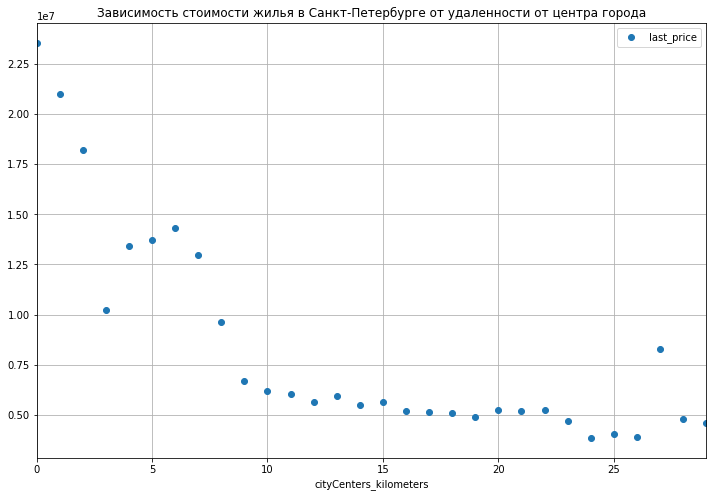

In [199]:
# создадим сводную таблицу, которая будет отражать цену среднюю цену квартиры в зависимости от удаленности
# от центра города и построим график
df_spb.pivot_table(index='cityCenters_kilometers', 
        values=['last_price'], aggfunc='mean').plot(grid=True, figsize=(12, 8), 
        style='o', title='Зависимость стоимости жилья в Санкт-Петербурге от удаленности от центра города')
plt.show()

Чем дальше от центра Санкт-Петербурга, тем ниже средняя стоимость жилья. После 9 км от центра средняя стоимость жилья изменяется без резких скачков. Поэтому будем считать центром города окружность радиусом 9 км.

### Анализ квартир в центре города

Далее выделим сегмент квартир в центре Санкт-Петербурга. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры (число комнат, этаж, удалённость от центра, дата размещения объявления).

In [200]:
# выделим квартиры, находящиеся в пределах 9 км от центра Санкт-Петербурга
central_apartments = df_spb.query('cityCenters_kilometers <= 9')

In [201]:
# изучим площадь квартир в центре Санкт-Петербурга
central_apartments['total_area'].describe()

count    3204.000000
mean       82.735802
std        53.929031
min        12.000000
25%        49.575000
50%        70.000000
75%        97.000000
max       900.000000
Name: total_area, dtype: float64

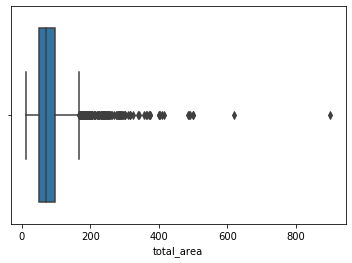

In [202]:
# построим график boxplot
sns.boxplot(central_apartments['total_area'])
plt.show()

Максимальная площадь жилья в центре Санкт-Петербурга соствляет 900 кв.м! Минимальная при этом всего лишь - 12 кв.м. Стандартное отклонение имеет большое значение, что говорит о большом количестве выбросов. Средняя площадь жилья - 82,74 кв.м.

In [203]:
# изучим цену квартир в центре Санкт-Петербурга
central_apartments['last_price'].describe()

count    3.204000e+03
mean     1.259224e+07
std      2.396811e+07
min      1.686000e+06
25%      5.700000e+06
50%      8.000000e+06
75%      1.218920e+07
max      7.630000e+08
Name: last_price, dtype: float64

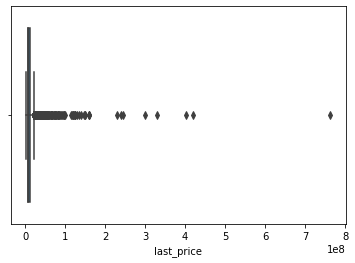

In [204]:
# построим график boxplot
sns.boxplot(central_apartments['last_price'])
plt.show()

Стандартное отклонение почти в два раза больше среднего значения. Это говорит о том, что стоимость квартир в центре Санкт-Петербурга распределена крайне неравномерно: максимальная цена - 763 млн. руб., минимальная - 1,686 млн. руб. Средняя стоимость квартиры - 12,59 млн. руб.

In [205]:
# изучим число комнат квартир в центре Санкт-Петербурга
central_apartments['rooms'].describe()

count    3204.000000
mean        2.595818
std         1.341197
min         0.000000
25%         2.000000
50%         2.000000
75%         3.000000
max        19.000000
Name: rooms, dtype: float64

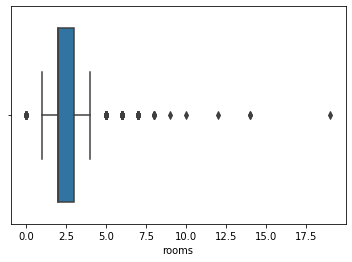

In [206]:
# построим график boxplot
sns.boxplot(central_apartments['rooms'])
plt.show()

На графике видно, что выбросов здесь встречается меньше, чем в двух предыдущих параметрах. В отношении числа комнат и не стоило ждать слишком большого разброса. Странным выглядит число комнат 0 и 19. В среднем встречаются квартиры с 2-3 комнатами.

In [207]:
# изучим высоту потолков квартир в центре Санкт-Петербурга
central_apartments['ceiling_height'].describe()

count    3204.000000
mean        2.903433
std         1.798771
min         2.400000
25%         2.650000
50%         2.700000
75%         3.000000
max       100.000000
Name: ceiling_height, dtype: float64

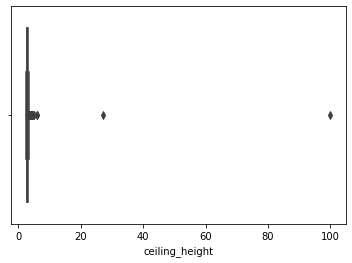

In [208]:
sns.boxplot(central_apartments['ceiling_height'])
plt.show()

В центре Санкт-Петербурга в среднем высокие потолки - 2,9 м. Аномальным выглядит значение 100 м. Но так как в рамках данного исследования оно ни на что не повлияет, оставим все на своих местах.

Далее определим, какие факторы больше всего влияют на стоимость квартиры. Для этого сделаем срез по определенным параметрам.

In [209]:
# создадим новую таблицу, в которую включим стоимость жилья и факторы, от которых она может зависить
new_df_spb = central_apartments[['last_price', 'rooms', 'floor_category', 'cityCenters_nearest', 'first_day_exposition']]
new_df_spb.head(10)

,last_price,rooms,floor_category,cityCenters_nearest,first_day_exposition
3,64900000,3,другой,6800.0,2015-07-24
4,10000000,2,другой,8098.0,2018-06-19
24,6500000,2,первый,2336.0,2015-10-31
51,45000000,3,другой,6589.0,2017-10-17
63,20000000,3,другой,4800.0,2018-09-11
85,5200000,2,последний,9319.0,2018-11-26
99,9600000,4,другой,2818.0,2017-09-26
111,4590000,1,первый,6175.0,2017-05-29
115,3850000,2,другой,8535.0,2018-11-05
118,4500000,1,другой,9089.0,2019-02-24


In [210]:
# посчитаем корреляцию между параметрами
new_df_spb.corr()

,last_price,rooms,cityCenters_nearest
last_price,1.000000,0.348337,-0.115399
rooms,0.348337,1.000000,-0.259759
cityCenters_nearest,-0.115399,-0.259759,1.000000


In [211]:
# найдем корреляцию между параметрами
new_df_spb.corr()

,last_price,rooms,cityCenters_nearest
last_price,1.000000,0.348337,-0.115399
rooms,0.348337,1.000000,-0.259759
cityCenters_nearest,-0.115399,-0.259759,1.000000


Цена квартиры в центре Санкт-Петербурга имеет положительную корреляцию с числом комнат. В большинстве случае чем больше количество комнат, тем выше и площадь. Так же мы видим обратную корреляцию между ценой квартиры и удалением от центра города. Ранее мы уже графически изображали данную зависимость.

In [212]:
# сгруппируем нашу таблицу по этажу
floor_price_spb = new_df_spb[['floor_category', 'last_price']].groupby('floor_category').median().sort_values(by='last_price')
floor_price_spb

,last_price
floor_category,
первый,5895000
последний,8150000
другой,8400000


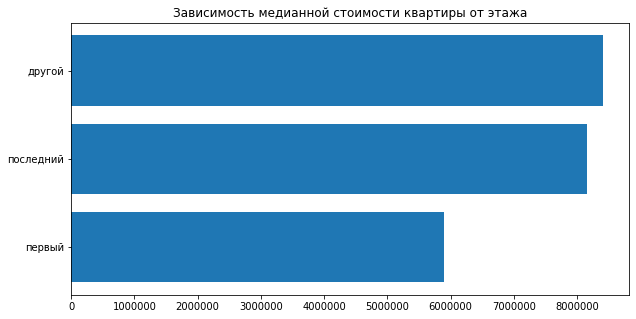

In [213]:
# построим график, отражающий зависимость медианной стоимости квартиры от этажа
plt.figure(figsize=(10,5))
plt.barh(floor_price_spb.index, floor_price_spb['last_price'])
plt.title('Зависимость медианной стоимости квартиры от этажа')
plt.show()

В отличие корреляции между ценой квартиры и этажом по данным всей таблцы в центре Санкт-Петербурга наблюдается несколько другая картина. Квартиры на первом этаже значительно дешевле, чем на остальных этажах. При этом нет большой разницы между медианной стоимость квартиры на последнем и остальных этажах (не считая первый).

Рассмотрим зависимость цены квартиры от даты размещения объявления.

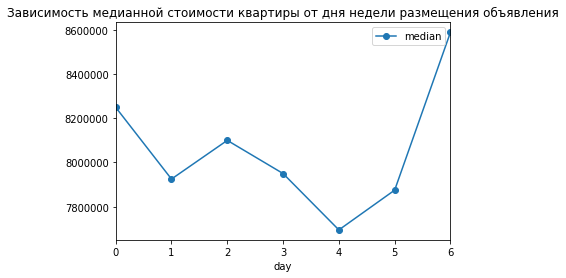

In [214]:
# сформируем сводную таблицу из дня недели размещения объявления и цены квартиры, применив функцию 'median'
day_price_spb = central_apartments.pivot_table(index='day', values='last_price', aggfunc='median')
day_price_spb.columns = ['median']
# построим график
day_price_spb.plot(y='median', style='o-', title='Зависимость медианной стоимости квартиры от дня недели размещения объявления')
plt.show()

In [215]:
# сгруппируем таблицу по дню размещения объявления
day_price_spb = central_apartments[['day', 'last_price']].groupby('day').median().sort_values(by='last_price', ascending=False)
day_price_spb

,last_price
day,
6,8589000
0,8249500
2,8100000
3,7950000
1,7925000
5,7875000
4,7695000


In [216]:
# найдем корреляцию между ценой и днем размещения объявления
central_apartments['last_price'].corr(central_apartments['day'])

0.01761992497058416

Несмотря на то, что между днем размещения объявления и цены квартиры корреляция очень слабая, можно отметить, что в отличие от ситуации с общим объемом информации, где самая высокая цена во вторник, в центре Санкт-Петербурга наибольшая цена в воскресенье.

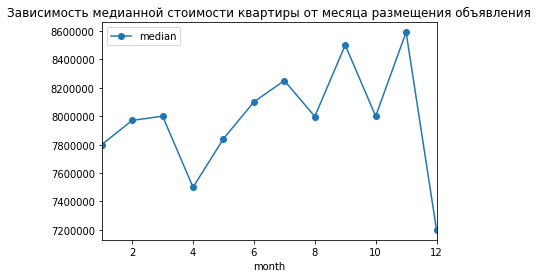

In [217]:
# сформируем сводную таблицу из месяца размещения объявления и цены квартиры, применив функцию 'median'
month_price_spb = central_apartments.pivot_table(index='month', values='last_price', aggfunc='median')
month_price_spb.columns = ['median']
# построим график 
month_price_spb.plot(y='median', style='o-', title='Зависимость медианной стоимости квартиры от месяца размещения объявления')
plt.show()

In [218]:
# найдем корреляцию между ценой квартиры и месяцем размещения объявления
central_apartments['last_price'].corr(central_apartments['month'])

0.008383307111852494

Согласно графику, наибольшая цена квартиры в центре Санкт-Петербурга, когда объявление размещается в сентябре и ноябре. Между ценой квартиры и месяцем размещения объявления очень слабая корреляция, поэтому доверять данной статистике на 100% не стоит.

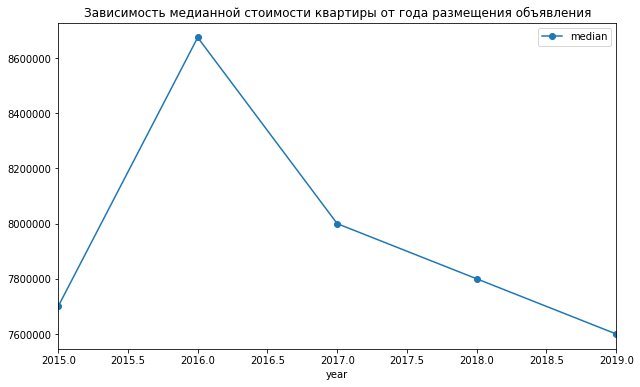

In [219]:
# сформируем сводную таблицу из года размещения объявления и цены квартиры, применив функцию 'median'
year_price_spb = central_apartments.pivot_table(index='year', values='last_price', aggfunc = 'median')
year_price_spb.columns = ['median']
# построим график 
year_price_spb.plot(y='median', style='o-', 
figsize=(10, 6), title='Зависимость медианной стоимости квартиры от года размещения объявления')
plt.show()

In [220]:
# найдем корреляцию между ценой квартиры и годом размещения объявления
central_apartments['last_price'].corr(central_apartments['year'])

-0.06076251022776271

Корреляция между ценой квартиры и годом размещения объявления обратная, но очень слабая. Согласно графику, в отличие от ситуации со всей совокупностью данных, максимальная медианная цена в центре Санкт-Петербурга была в 2016 г., а минимальная - в 2019 г.

Таким образом, ситуация с квартирами в центре Санкт-Петербурга отличается от ситуации во всем городе. Основной фактор - более высокая стоимость жилья, обусловленная расположением недвижимости. Также, скорее всего, продавцы и покупатели из этой зоны обладают другими финансами, из-за чего ситуация в мире и России в различных областях по-другому может сказываться на их поведении.

## Общий вывод

    Исходная таблица содержала ряд пропущенных значений, которые были обработаны или оставлены в зависимости от влияния на статистическую картину. Многие столбцы содержали в себе аномальные значения, которые не могли бы встретиться в действительности: 100м-е потолки, нахождение по одним и тем же координатам домов с разным количеством этажей, большое время нахождения объявления о продаже на сайте Яндекс.Недвижимости, 20 комнат в одной квартире и т.д. Данные значения могли быть ошибочно получены автоматически (картографические данные), либо умышленно или случайно заведены вручную.
    Так же было проведено сравнение стоимости жилья в центре Санкт-Петербурга, и во всем городе, а также проведена оценка влияния различных факторов на его стоимость: наибольшая корреляция с общей площадью квартиры и близость к центру. Было установлено, что стоимость жилья в центре устанавливается не по той же картине, что и во всем городе.
    Сервису Яндекс.Недвижимость стоит установить более строгие критерии размещения объявлений и контролировать сроки их снятия, а также вручную проверять аномально подозрительные значения, которые не могут соответствовать действительности. 